<a href="https://colab.research.google.com/github/Djinho/EvoNet-CNN-Insight/blob/main/Selection_Gene_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import gzip
import shutil
import os

# Directory where your .gz files are located
directory = '/content/'  # Update this if your files are in a different directory

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".gz"):
        # Path to the .gz file
        gz_file_path = os.path.join(directory, filename)

        # Path to the output file (remove the .gz extension)
        output_file_path = os.path.join(directory, filename[:-3])

        # Decompress the file
        with gzip.open(gz_file_path, 'rb') as f_in:
            with open(output_file_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

        print(f"Unzipped: {filename}")


Unzipped: TYR.vcf.gz
Unzipped: IRF4.vcf.gz
Unzipped: KITLG.vcf.gz
Unzipped: OCA2.vcf.gz


In [3]:
import os

# Directory where the files are located
directory = '/content/'  # Adjust if needed

# Loop through the files and delete .gz files
for filename in os.listdir(directory):
    if filename.endswith(".gz"):
        file_path = os.path.join(directory, filename)
        os.remove(file_path)
        print(f"Deleted: {filename}")


Deleted: TYR.vcf.gz
Deleted: KITLG.vcf.gz
Deleted: OCA2.vcf.gz


In [4]:
import os
import gzip
import _pickle as pickle

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers, activations, optimizers, regularizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import CSVLogger
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_curve, auc, precision_recall_fscore_support, confusion_matrix

import itertools
import matplotlib.pyplot as plt
import skimage.transform
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense,Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

In [5]:
%run -i ImaGene.py

creating SLC45A2 DATA

In [9]:
file_SLC = ImaFile(nr_samples=198, VCF_file_name='SLC45A2.vcf')
gene_SLC = file_SLC.read_VCF()
gene_SLC.summary();
gene_SLC.filter_freq(0.01);
gene_SLC.resize((198, 192));

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 1824, max 1824, mean 1824.000000, std 0.000000


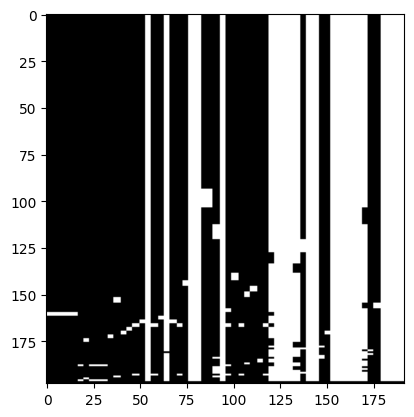

In [11]:
gene_SLC.sort('rows_freq');
gene_SLC.plot();

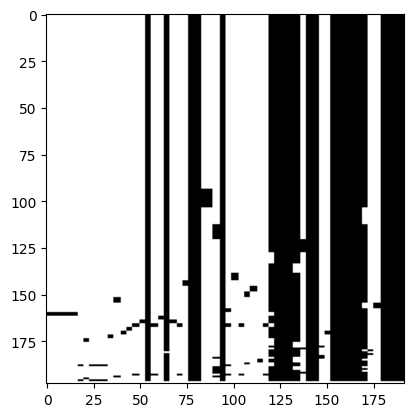

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 192, max 192, mean 192.000000, std 0.000000


0

In [12]:
gene_SLC.convert(flip=True);
gene_SLC.plot();
gene_SLC.summary()

In [13]:
path = './'
gene_SLC.save(file=path + 'gene_SLC');
gene_SLC = load_imagene(file=path + 'gene_SLC');

creating TYR data

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 2701, max 2701, mean 2701.000000, std 0.000000


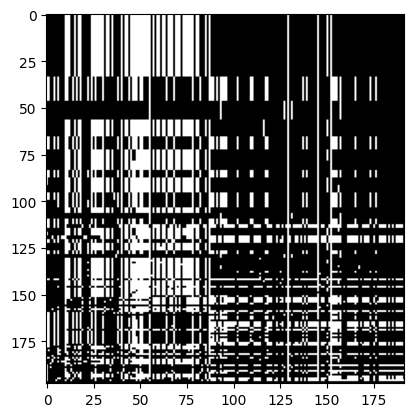

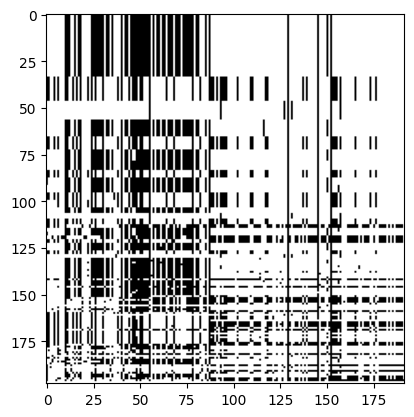

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 192, max 192, mean 192.000000, std 0.000000


0

In [14]:
file_TYR = ImaFile(nr_samples=198, VCF_file_name='TYR.vcf')
gene_TYR = file_TYR.read_VCF()
gene_TYR.summary();
gene_TYR.filter_freq(0.01);
gene_TYR.resize((198, 192));
gene_TYR.sort('rows_freq');
gene_TYR.plot();
gene_TYR.convert(flip=True);
gene_TYR.plot();
gene_TYR.summary()

In [15]:
path = './'
gene_TYR.save(file=path + 'gene_TYR');
gene_TYR = load_imagene(file=path + 'gene_TYR');

CREATING OCA2 data

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 2506, max 2506, mean 2506.000000, std 0.000000


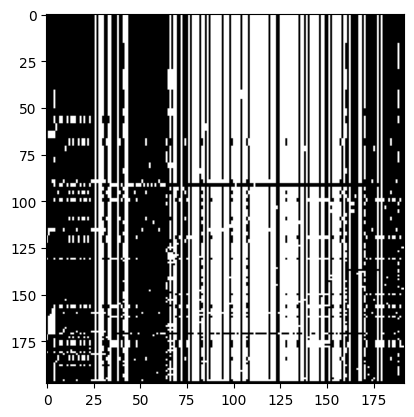

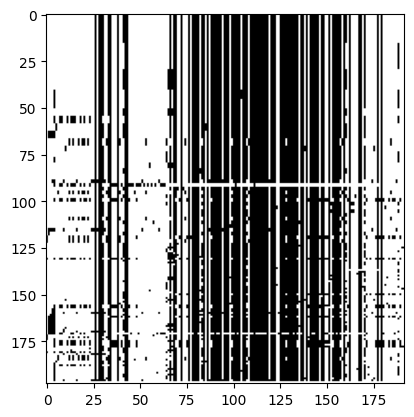

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 192, max 192, mean 192.000000, std 0.000000


0

In [16]:
file_OCA2 = ImaFile(nr_samples=198, VCF_file_name='OCA2.vcf')
gene_OCA2 = file_OCA2.read_VCF()
gene_OCA2.summary();
gene_OCA2.filter_freq(0.01);
gene_OCA2.resize((198, 192));
gene_OCA2.sort('rows_freq');
gene_OCA2.plot();
gene_OCA2.convert(flip=True);
gene_OCA2.plot();
gene_OCA2.summary()

In [17]:
path = './'
gene_OCA2.save(file=path + 'gene_OCA2');
gene_OCA2 = load_imagene(file=path + 'gene_OCA2');

creating KITLG data

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 1937, max 1937, mean 1937.000000, std 0.000000


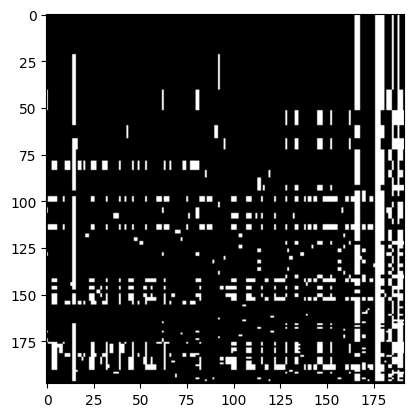

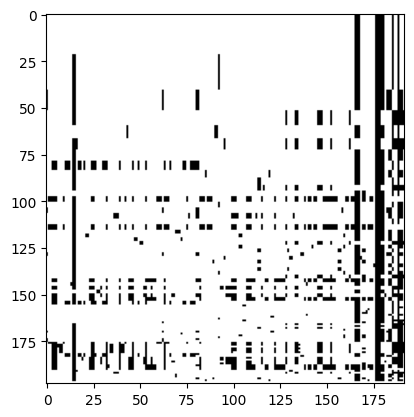

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 192, max 192, mean 192.000000, std 0.000000


0

In [18]:
file_KITLG = ImaFile(nr_samples=198, VCF_file_name='KITLG.vcf')
gene_KITLG = file_KITLG.read_VCF()
gene_KITLG.summary();
gene_KITLG.filter_freq(0.01);
gene_KITLG.resize((198, 192));
gene_KITLG.sort('rows_freq');
gene_KITLG.plot();
gene_KITLG.convert(flip=True);
gene_KITLG.plot();
gene_KITLG.summary()

In [19]:
path = './'
gene_KITLG.save(file=path + 'gene_KITLG');
gene_KITLG = load_imagene(file=path + 'gene_KITLG');

CREATING IRF4 DATA

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 3210, max 3210, mean 3210.000000, std 0.000000


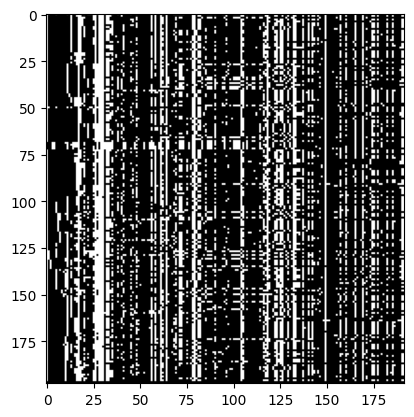

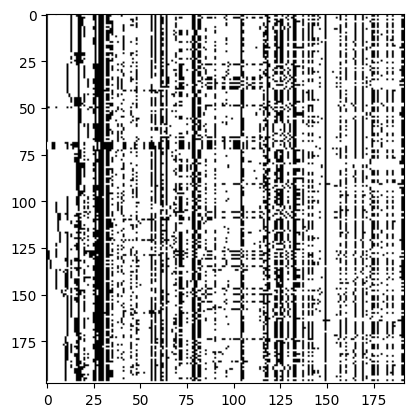

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 192, max 192, mean 192.000000, std 0.000000


0

In [20]:
file_IRF4 = ImaFile(nr_samples=198, VCF_file_name='IRF4.vcf')
gene_IRF4 = file_IRF4.read_VCF()
gene_IRF4.summary();
gene_IRF4.filter_freq(0.01);
gene_IRF4.resize((198, 192));
gene_IRF4.sort('rows_freq');
gene_IRF4.plot();
gene_IRF4.convert(flip=True);
gene_IRF4.plot();
gene_IRF4.summary()

In [21]:
path = './'
gene_IRF4.save(file=path + 'gene_IRF4');
gene_IRF4 = load_imagene(file=path + 'gene_IRF4');

LCT Data creation, this gene already 198,192 so no need to resize

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 2200, max 2200, mean 2200.000000, std 0.000000


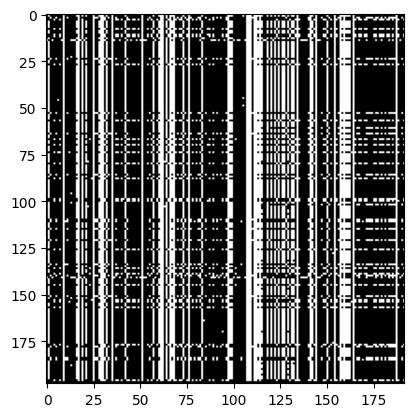

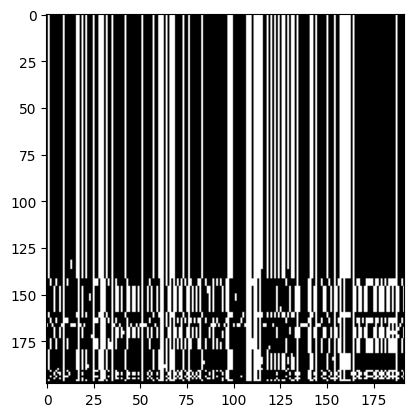

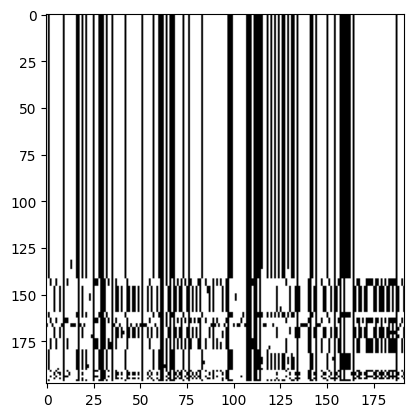

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 192, max 192, mean 192.000000, std 0.000000


In [23]:
file_LCT = ImaFile(nr_samples=198, VCF_file_name='LCT.CEU.vcf')
gene_LCT = file_LCT.read_VCF()
gene_LCT.summary();
gene_LCT.filter_freq(0.01);
gene_LCT.plot();
gene_LCT.sort('rows_freq');
gene_LCT.plot();
gene_LCT.convert(flip=True);
gene_LCT.plot();
gene_LCT.summary();

In [24]:
path = './'
gene_LCT.save(file=path + 'gene_LCT');
gene_LCT = load_imagene(file=path + 'gene_LCT');